# Data Enhancement
A common problem is the amount of data available to enter the models, for these to present the expected results it is necessary for the training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks are not available.
This is where the **Data Augmentation** technique comes in, which, as its name indicates, allows us to increase our dataset in two ways:

* Introducing disturbances in the original data. For example: taking an original image centered, replicating it off-center, inverting axes.
* Using different distributions. Ex: if we want to train a model to classify high resolution images, we add low resolution images, with noise always maintaining the highest proportion of high resolution.


At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

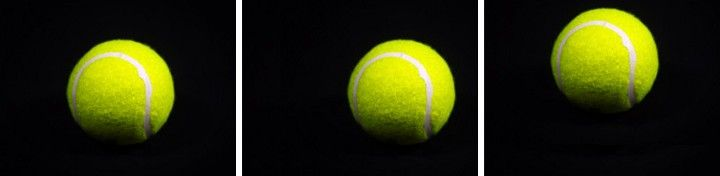


The same ball with some translations.



So if we work with images, we only need to make some small alterations to our dataset and we can achieve our goal. There are many ways to increase data with images, such as:


1.   Flip the image
2.   Rotate

1.   Escale
2.   Cut

1.   Translation
2.   Gaussiano noise









#Keras library

The Keras library provides the ability to use automatic data augmentation when training a model.
This is achieved through the use of the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



* The changes in the image (translations) through the arguments **width_shift_range** and **height_shift_range**.
* The flipping of the image through the arguments **horizontal_flip** and **vertical_flip**.
* Rotating images through the argument **rotation_range**.
* Image brightness using the **brightness_range argument**.
* Image zoom with the **zoom_range** argument.

In it's various content, Keras has a ton of different arguments, the last list showed some of them, here is the rest:
* **featurewise_center:** Boolean. Set input mean to 0 over the dataset, feature-wise.
* **samplewise_center:** Boolean. Set each sample mean to 0.
* **featurewise_std_normalization:** Boolean. Divide inputs by std of the dataset, feature-wise.
* **samplewise_std_normalization:** Boolean. Divide each input by its std.
* **zca_epsilon:** epsilon for ZCA whitening. Default is 1e-6.
* **zca_whitening:** Boolean. Apply ZCA whitening.
* **shear_range:** Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
* **channel_shift_range:** Float. Range for random channel shifts.
* **fill_mode:** One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'. Points outside the boundaries of the input are filled according to the given mode: - 'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k) - 'nearest': aaaaaaaa|abcd|dddddddd - 'reflect': abcddcba|abcd|dcbaabcd - 'wrap': abcdabcd|abcd|abcdabcd
* **cval:** Float or Int. Value used for points outside the boundaries when fill_mode = "constant".
* **rescale:** rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).
* **preprocessing_function:** function that will be applied on each input. The function will run after the image is resized and augmented. The function should take one argument: one image (Numpy tensor with rank 3), and should output a Numpy tensor with the same shape.
* **data_format:** Image data format, either **"channels_first"** or **"channels_last"**. "channels_last" mode means that the images should have shape (samples, height, width, channels), "channels_first" mode means that the images should have shape (samples, channels, height, width). It defaults to the image_data_format value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be "channels_last".
* **validation_split:** Float. Fraction of images reserved for validation (strictly between 0 and 1).
* **dtype:** Dtype to use for the generated arrays.

Let's look independently at examples of images after they have been enlarged. It is common to use a variety of magnification techniques at the same time during training.


In [ ]:
import matplotlib.pyplot as plt    #A library that allows you to graph, very much in the style of MATLAB
import numpy as np                  #Library that allows you to work with  
from numpy import expand_dims       #Expands the array
from keras.preprocessing.image import load_img    #From the Keras library for data enhancement, we load the image in the format of the python image library (PIL)
from keras.preprocessing.image import img_to_array #This will take an image (PIL) and convert it into a matrix. If it starts from a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #Class that takes original data, transforms it randomly and returns only the newly transformed data
from PIL import Image #Image library from Python
from urllib.request import urlopen #Allows to read a URL


First, we have to upload an image from internet.


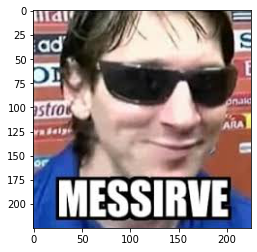

In [ ]:
url = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEhUSExIVFhUWFRUXFxcXGBcVFRUXFRgXFhcVFRUYHSggGBolGxUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OFxAQGi0dHR0rLS0rKy0tLSstLS0rLS0rKystLSstKzctLS0tLS0tLTctLSstLTctLS03Ky0tLSstLf/AABEIAOEA4QMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAFAAMEBgcCAQj/xABPEAABAwIDBAYDCgoIBQUAAAABAAIDBBEFEiEGMUFRBxMiYXGRFDKBCCMzNUJSkqGx0RUWU1Ryc7KzweEXVWJjdIKT8SVDosLSNDZEZfD/xAAbAQACAwEBAQAAAAAAAAAAAAAAAgEDBAUGB//EACYRAAICAQQCAwACAwAAAAAAAAABAhEDBBITIRQxBUFRIjIVQmH/2gAMAwEAAhEDEQA/ALriVQW1NA4ZrPbYgerq0b15hrnNr6qLW2QObfhfkh1TiEz209oR71lIN+AC5/CE/pTqnqRcsDLX4BJvRuhp5g7DGVFR1hdO9scZfnIOtgdw70cxidopKaWKR+XrGa5jdwJt2kOw+eWIyEQtLZSS5hOlyuquqkkp/R/R2MAIIsdG2N9Eb0PPDP8AAvjTh+EaUOcQ0xudv0uLfesu2yxN0tbNle8NYTqHED6lY9rsVkkEZe3I5jcrSDqd1/sCzvHKqzHgetI7fxQYpqnTJmC1ziXymSQtaD8o71XK3FJXvJEsm/Sz3DTzT9VV9XTshZo52r1DooxcKbKw1QvkyXMsm755+9GcEbI9zRnfqR8oqFSwZrX3cFYXvbTR9Yd/ybcSkskK43iBByB7iQA3Qn1lTpZntlI61/ZGX1j6x1KIuq8ozON32zkb9XbvJBYrvzvO/wBbxJ4qGxizYTK51u2/LnAJzHeP52V0wmR8nW2J9Zsbbk6uNy4jyCrMFA6OmGUXLgHd+Z2lvHitAwHDA10TG6tjj6xx+dJJxP0SkvstXQcfSe9hvIBAMRwpzgTd3mVbSE3JGLKQiygwtk0HaBbwuUbFIZhfXv1UqalDZM9k7Geqdm+Q869x5pfRY6oBy4CfnO8ygmM4U9jCQ9w5EErSnxgqFWULXDVoI4hDbEVMzTBMSMp9GnJ64Dsm+jweI5lRMWwogG7njf8AKcntp8ONO/qj2bkvp5h6zXb8jjyR7Z+vZWxOjewNqYxZ7T8v+8bzBQmFGRYxSPaCRJL9N33oCZ5QPhZB/nd961LaXCrEiyz/ABilyndxTqQjRGwvGZong9Y8jvc4/wAVpzsR6xlPI2aVgdKGExkl9iNzRxWRzssFddhq972iJr8j2PD2OtexHHVNF0xdto0eJrB8rE3d9nJGJv8A9n5uCGGbEL3OJO8AB9y5fNXf1k/yWjehPHkE/Rm/NxP6TvvSQjra3+spv/3sXiN6Dxpk3I+zbX9Uce5cdXJ3+ZVFfWTMs1z5GkAaEm6fy1pANprHcddVRwG3zaLn1cnf5r1sMnf5qjxekvf1TTKXg2LQSSD3qxYfs880jqioknieJhGWkkWaTYuRw0HnEHamqDHtY7eBc630VIxWFznB5N2305J7aCdhml6p73Rg5WuebuIF7qBBiIa3I4XafqU1RkyT3OyLVR3OYG6JYNRF2pFlGZStdqx/sKN0wDWi58krYqC1FGGkG/8AJdT1rHOGbVjLkDmeCFSVWbsjQfWnKSnDju70tjJDFVm7Tnes+wA/s/7I3hOH53xAC2d4Nv7qPf5kLrZ/CjUVL3P9WMDwVs2Qpmz1ksrfg2gRxcrD1z53UMsSD+HUwdKxpAysDpXfYxvldG8EcIr5z8K4ll+AG5v1lMxUxD3M3ukcC+3yWN3BGauiZI3KRoNR3EbiFBMiU1eofSSSNd1bxcDc/n496IKRKGamEOCiNja9jo3eB5+KIWQzF43M9/YPV9Yc2qGht30d4U97R1Umrm6A8xzRB4UWUBwbIw33HxapTDcIIAO02CtniN23LO03+IVEdRSh7JoTd7O3E8b3Rj16d/O2tlrJCo2C0LmvqYHXyidzoXcWkgEjwvdA0XZCxF0c8QnboHDVvFruII5rN9paUF4A539i0qtoHAOAZYk3dbcTzVMxjDnAucd5v7AhEzRmtee2R3o70dy3rY4r2605bngUAxVtpCFI2alyVdM69rTxfW4BWKNlSlTPoUbFy31kb5LmTZYA2dUxA8ri6O7cOnFHMae/WZezbf7Fm+A4thTWNbURSmUjtySXLr8730V0cKYstXJOi2fioPzlnmEkI/CeBc3eb0k3AL5kwJsvQslxb32QTAAvBtZr3W0Fkb2W2vq5cRdTzRNDA97WsDfUa02brbuVQq46x87apjOqcMpbk0GncrZHtXiGjhTRB+l37nGyltCuEh7EnOpIKmopmgzPqXh77Zi0DuCYnxqerwKomnblexxykjLmtbtWQqhxbEYZpZQxhEzszo3epfuQvb/aetkpepmZFGx5Fms7lDYbWjNZ58wTW8LwNJ3artjbb1UxiVhEV3XKKsF0Kp5gFNp3kkWVbGCTYwNUbwxp3NZdzhZvigUcbnyBrVoeB7JSva2z8p4kb++3JKWIgTzCGP0KnGaql1kI1DAd+qvex+DupYGsDe3bUnmd6n4HszBSi7GgvPrPOrnHxKNMbqoZaukcUFJlBJ1cd5U2y8aLLpBU32eWSSXqkBLxzRYg7jwXq5c8KSKsH0TOrcY7dg6t+5ErJpxabLrOEEtHV1FNI29wNS6/tKkZwmpJwAoZKTGJaRuveqljOHgk6c1cGzXCh1NKHg6JSyuuz5i2tpslQ4W70Pwv4eH9dH+0FbelSh6upvwVSwmMmeID8qw+RBVsWU7XfR9WbWOnFBKae/XCIZLC5JtyVfdWNygVWGOzlupYxrgT46JSbVTCwaGiwA+pMfjRUn5Q8tFYsyRL0U5djPpVH/VE3+mPvXqe/Gep5jySTeREjwJgdtFOWt97fbKOB5Lz0Co4RSeSsmH1GLTwteBDCLaNcCSeV+Sbw3bSWKoFNXxtic6+R49Ryjhb9EeavwA/gip/JPVI6TaWSMQiRhbvIvx4LYNtsfq6SM1ETYnQtAuHesSeSyTbbGZsSMZmYGGMaAd5+tLx0geo39UcbB01NJFIx8fvhaS0nnrZBtqtnXxNa8G51zjl4KZgDHRy2B4fUjGM0z8l3AkFJYbTNYiptGTddzUNiSuGnKlZFFrwkmDJK9lw4mx52Wh4b0h07bBzCFnUuKNkpY47nOx262ljvQt8lkyQydG4R9IdGflEexEqLaunlNmOuvnwzDwT9Pi7otWPItyTbA5D6Im2hjYNboZVbXRjUOt4rFm7dVA+UHeKls6QT1T4zAxznC2a27fu80bCN5pU23jRuIKHy9IBOjTZZP8AhkZhmaU5HisRJvcKNhKmbJQbXE2u4IvDj7XcVilDjkIcMxOVWbD9pKTg8+1Q4lsJo09lfuUj07RUaLaSnuGtkBKWIYyWbzpzS7WW7oluqMVso0WJC/aKoM+0TT8rVCKnG3EizwEbGQ8kUa8MXjHFdNxuPddZZDVwFvbrMp5AXTja+jZr6Y4n9FRsZU8qO+mygzMZOzXXtKn9HeHB0r5ntv1bczRzcieP7UxysdACXt5lB8OrxH6hI7lPpBCXdmgMxR/FjUYwqJ00bpesYxjD2tLqpUFYJWg8eKuOx8gbT1ZsDbWx3HRRjimzqZclY00LrYPztn0EkE/GD+4i8kldxRKOWRrlO7stI10CyjpqqGGWnY3WTtaDeNRZWClwIRRhkOIyMZYdm4NvArvCNmsOgl9IfL103z3m+vcFepxX2cPgm/o928jd+BXhx7QhYTfmAFQ+kZreqoXR2zPhGYN3mw4rSsfZh9YGieQkN+SCQDfmFn231BRRPpvRfWc/ITcnTWwVcpJouhikvoBbPYeZZWHW/FaPieBtliDANWhVKmzUNTnt2TvHerVX7WARXj3lZ0a9vRl2MYf1by224qvVMdnAK+NgfO573byUAxPDckrWnidEWVuIa2SwITMdYXNlT68Fr3N+a4hbr0e4X1cWY8Vl3SbhZp615t2ZO0E0WJKNFSe5NOevXFeZVbZWRXL2M6p9zE04IA4qZF40gpTN0T9LEA0kqQG7KRC5R3BOxCygCbHKRqFJOLSOFnOJtzN1a+i/ZNtZKZJQerZr+keS1XGdh6KSGRrYWtcWmzhvuBojoc+daiuPAqBLVPve66q4THI+N2jmOLTz0OijOKghj4lcRclNdceaTGXXJUMhHrXG6K0Y3IS3ejVL/BVyLYFy2aoy6Nzm63crXgdRLAJGdW14ktmDjYcrIRgbMtNGNxIufapmZUcu1nZjBSxqLCvWM/MoPpLxCklPkMjxojAb2W6ncOJXgCJMwOpIbaI2sF0Nm6o/8u3eo2zK1PGkDXFQMSp8xidbVsrSO7VWePZepcLgNI5grs7JVe4Bu8JlGQssuMn43homYDluePkFTXbPSF1mk2vuutVEJjjBktYN7VkOw+gbI4ysNmncnozykmDsKwNuVrba8VX9utnC2eJ7dwI+1X+ktHLY8dyY2giDi0ngoZW/Z3gTckQHcPsQDpK2ZFbT52/Cx7uZ7kZo5raImCChMiUbR8yT4eRoAczfWad90PJsbEWI5rftpthY6hxlYS2TuVDxnY6ob8JFnHMCxVyZQ4GcSvK5CP1OBWOhI7nA6Jis2fexmfM0g8t6axNrArwm85GimmkcvDRO7kWG1jNOxEKekMjgxou5xAslBSnQDmFrHRxsq1rvSXssdMoP2qGy2GMv2xuCtpKZkYADrXceZR2yajTjtyWwaPmLpVw3qa+UtFg911UG3Wt9NFAXyNkA3b1lboiCmTElFnAJXuRdtYurKWQrOWM1VlwCj62VjB4u8Ag+F0L5ZGsaLkkDzWnYVs2xjQGyWcXObKbHs5G5jbnoq2rNOGKu2EWsaABnaOXsTb3MHyxuumn4Nd0eR7nxvaDmA3ZjZPPwGzCczjl6wOtbM7I4ABo8FXwWdVZ8cUNdcz5/1JIn+AKflP8AUkjxiPKgHqbaWQdcwhknVRte0svYk8Co+NYlN6A+Uytu8tAyixbmNsviu9naOeFkkxgYXS5crMwAygaX0Ub8XJjTOa4sD31Am6u+jQDfKDx8lq6OSSIamenZS0QeM8gJL7eqwa+aHV+0U7mTyRy5Y6Z7YwbayPuL380cmoM1bHUvlY1jICwMvchzt5v3IRS7OARmF9REIDOZjbVz9QQ069yHQV/wax3aZ5nbTmwDhEHnh2gSVe6KnYxoDN1gqTiuDUrp5J3VDS1wBycQWAhtjdRdkduontML3ZXNcQL8QDoqZEv0X6qpmEhx0IKG4rOH2DeG9SJcThaA5zhbfvVKw7aeOprJo2HstAt3lIyUH26IlRy80NaE/TnVKMg9E8FduaDvQ8PtxXJrO9OpEvHY/PhEDxZ0TCD3C6r+LbCUT29lmU+OiLOxHvUZ+L96ZyIWLspNX0fw30uFDZsRC13G3errUYkLIWazO6wS7izjQxhmy0DSLMvqrlTtDQGgaBRsLZ2VNa1SM0gjCuym4Touygxv2UvbfDw5j9L3BssqjwMSNPMGy3LG4w4AKk4xhIgex7bZHnXxRdGiMbRn8mxcjj2UUwno3e83ebBXqlkaLqb6YLaJXMONWC8K2UgpRmaLuGoJ4EITVPle+5ksBmsBoNRY+JR6oqQ4ZXOyh1wXchzVclYGtDmNc8lxa1g1cQPlk8Aq3NmjFBWNPZIAAJy0AAADTQahMsDgb9c7S/HffemjXNvrGd+ovqFb9ncNpKtt2hwI9YHgqp53Fdl2RRh20Vfr3fln+aS0D8UaX5p816qPOX6U8uP8Ke2V+QXmO4fKK4Mn96fMqbX7OsZkHW6Pc1rBbXdqma/Z0RTwxZswkvfhYBb3YyWNEN7mflD9a5kljAN3FHqvZ2F1SIhIGMbGC6x1JKH0+DQOZG0EkuqXtNjd3Vtvr3KNsiHOFdIrWJVwdZsd9b5iRwHJUeWX3w2J0J1C1rF8GpITKBIey1oHHffNb6llVbTNjc430vonSZlysmnFpS3KZHW8VK2VnEM7XNvcuF/agUbw7cUaweHtNPIhNRnvs2qKW4BTnWIXg1RmYPBELJGXRFV1ZDd6EOxJ196nVsRISpsGDhqlLNwKkxU3USXET4KwOwFqgT4TGDZMFgWWrc/QXR7CqWwBKbjoGDcicDbBSTYxiOMvprEMLm9yboNvIH6PDmHvUmtYHMN9VTcRoxyBQhrNMotoYTuOnNe1GOs4FZG2rMfEqJPtE651QI4qzTsW2iYOOqpO0WNvkDW8AboNROdK+7joiNfGANEUG4cocWJFlIOJkcUCYct13BdyrZFssVFTuqnCO9mkFzzvIA7lOoMIMMs7Mz8rREG20LxJpe/BCKXF3QscxgsXDKXcQN+icnx2R4s4nc0E8Tl1Gqm4r2WxjP6ClBslFJPUZs3VseGM11zWubnjqu+jjPHNVRP0LCB4670FmxqZ9ruOhzaG1zzNt69osZlic9zLBz9XHeSs2pUZxpDvHOSps1TMvVmv411Pzh5JLl+KyvxmR5zO7IbnsgEG/G1rrwxzkgufqNxvqFwXHK3wC5zLsORvqNej2Skcdc+vE33r2Kic3tNkaDbgddVwurqYtv0LLakMvjbqXPvzJVG2rmY51mcEexjEDfK3/dUjEam7j4rdwtRTZyM2ZN0jinuDorHhheG3VdpZFbsGOaw4XVbKkW/ZDETch2gVyjmBVdo8Ka1ocN6lQykHeq2Xx9FgLAd6fYQBohtPVA71JMoQTZxWVNuKHueN5T0sHWFTmUQtYi6gZMCenxgovSBj7WcPNI4NGdS1cTYQze0lpUkoJuwoOba6DYhgO/RcPNVH6jsw5FC6vaepi0fGUyGSBuKYK4bgh9Psm950aiB2yv6zFDn29e3SNh8kA0GKbZZ8bbusLBAMUro2EtuDwXJxmtqt5yt4qLBs7d13ElQ2VP2PRxh2oUqGAAXUh0TYxYJmsBDWngSkkuhodyIrlyEkllbOklSOXL0HvRnZeKEzEzNzMawm3ervBW0vyaUHwF1fjwb1Zky6njdGYX7/ALV6tU/CcH5ofopJ/FZV5xQTCcrdOAXAYVYKTZ0Oibne/M+PM23qNAF9TzUOtwykpYhJKXuc5mYWOh8FvWjxt0jnf5PIvoDzyBm8hBcRxMu7LN3FQKmcvcTrYnQcl41q6en+NhDsqn8jOSEYtFWcRo7ElW0BBMUboT4qzWYUo9FWLI3IEUdK5xsN3NXPZSkJcBbiE1gNC3qA/wCU7grzsphwFidF56R0ootFJT9ndwQ7F6TL2gFYIxZNVsGZpVZaVNlRZS4a4nRC66PI88rojhsYcgVMIUNVY6o82S4CBsprFT2OIG9AxMkk0UaV64LkzI5CLInMr1ClN94B8U3XTEKu1+JvBNk1j2E6mjivfK1DJ+qGgy35AaoBVYpK42un8KpnFwcUWRZYKRndoptRO1rNwuuWQm3sQ/ETYb0pS/YNmkzG51F72Gl+5Nvnc83da3Bo3NHJK64cq55OqNWLD3uPF6vF6s5rJ+CYkaeTrAA64tY7iEeG20gN2RMaVUgF0VbHI4lM8MZu2W78fankzySVRzJKeaQvi4wxPtJJHEIy8luW2Xu5Kr4jir5iA5xLWizRwAUOaUkXceSavYEr2ODTKKt+zyubKn0juLVxUvKFGpxlZc79Sh0OOveLsp5HAG123cL8rgb9VfkzwxVudFUISn6DKEYm2+nNwHmUn4vKASaWUAakkOsPE2UE4m+U3ZA91nAnLd27mQNFh1OqxThSZpxYpqVs1bCtnWxMbbW7QfNWjDqPLYrP2dJD2taDh0/ZaBftDdx9VPU3SzmHYw+Zw5tcXDzDV59xZ1YzikagErXWbf0qv/q2o83f+KYl6YWtJa+ilabbi+x7rggWCjYyd8SzY9SC5Q6hmLDa6rzOkOrqBePDHPHNrnkeeSxQnEdtJ43DraJ0XiXDyu0KdjE3o1ulmDhpqnwsupukiGKPMGvc4/I0BH6R5eCepOkWumGaLDXPHNpkI88qjYxuRGpMZfcF6aS6zD+laogcBUYe5gPNzg7/AC5mgEqWzphaXkRUUsg3izu1bmWtBso2MdZYl3r6C+5VrEsEe46BD5elwtF34dM0cy4geZavW9LJcAW4ZOQdxBJB8DlQ4Ms5ofpJp9kH3uQiUODZEGd0ukb8NnHtI/7UNn6Xo3bqR+a+7OP97qdjIeWFey4SNyhVLGMSAflCgVe3UzwbUMw7+1/4qny4xI+Q3jeX3PZ1zD2WurcWNP8As6M8stPouzXg6heqqwYtOzU0spHHRwH7KlM2hkIuKSUg7iA4jzsqM2Dv+PZtw6uNfyLAvUA/D8v5nN5O+5SsFxkVBeMhaWWuCb79P4LM8Ul20aI6iEnSYWC8eVzdeqsuOdUl2kpJoEVWV2Vo7kxKLuEY4alKji7JeeWi6w75TzvJsvoUV0eDHpvVP6J+xaR7nVjThsxIH/rJO/8A5MCzWY9l3gfsWl+5y+LZv8ZJ+5gXH+U9xN2j9M0XGqJslPKzKO1G8bhxaVnPufMPyUM5cBc1LxqODGsb9oK1LrAS5nEAX8HXt9hVZ2FofRKJ4cLWnqnn9EzPLf8ApsuSbCwVsLerf2R6juA5FZl7nhgOHyXAPv7hrrwB/itRrPg3/oO+wrMPc6/F8n6937LUAaTVVMEVusdGy+7MWtv4XWO41gcGJbStYS18LIGSOyEFrsl7NJHeRfwRbp22cq6xtN6NA6UsL82W2lxpe5VK6F430WMOp6hhjkdE5uU20cbOA9oQBvGI1lNQU7pXgRwxNHqt3DcAAN66qKOmroBnY2SKVgcLje1wBBHI6qNtpgPp9HNS5spkb2XEXAcNQSOSyjE+kPFsIbFSz0UVo42Rsku8skDAGhwcDbcNyAA2x2wcT8dnpHjNDSlzrH5QuMgPd2gt1xfEqbDqczS2jhZlb2W7rmzQAPFY70P7U+lY1UzStax9TFo0XtdpabC/c1avt/s4cRoZaUPyOdlLXHUZmODgD3Ei3tQBOxXCaethySxtfG9txcai40IPA6rG+hnDBTY1W028RwyAE8hLHb6nJ/HOlHFcOc2nqKGFpa0Na67y14aLXa69juUboTxd1ZjVXUvaGulp3uLW3sD1kI0v4IAvnTbGBg9QQANYuH941Guj2MHDaQkD4BnBB+m/4nqPGL941Gujv4spP1DEAT48RpXzvpQ6MzMaHOjsMwa7cfBZp037JwtpxiEUYbLE9mbKLB7S4b7cuasGH4FUDH6isLCIDTsY1+lnOsNBx0svem2razCZg46vLGtHEkuCALhhpbJDG8Nb2o2O3Di0FZPguFW2qqDYWEZk3adtjbaeJV96MazrsKo3k3PUtafGMlh/ZUKkog3H55PnYfCfaZns+yNABrbCVsNDUyZW9iCQ7rbmlM7Cxj8HUhIHwEfD+yEM6YqvqsIqj85rWfTcG/YSi+w3xdSfqI/2QgCbU19Mwlr5ImuHBxaD5FfMuCPHpdaRuMriLcusfaysnS1sZiFTiU00NLI+MtZ2xa2g13lU3ZAZRIdxuAfZdNHHyPaTHJxtSLWE4FGjepLVjzaWcGdbDqYzQl6lZJZtkjRvQEqdI2tG82CeBDQB3fWmB2i3usm+JX0JejwzHZHXa7wP2LT/AHOfxbN/jJP3MCy5w7J8D9i1D3OfxbN/jJP3MC4/yvuJt0fpl0oav/idVCT/APFpHtH+epa4/sJ7bKoEVDUO3dggeLyGj63BVp1Xk2k6v8rhwHtZI5w/in+mOryYeG3+EqaZnj74HkeTCuQbS5VPwTv0HfYsx9zr8Xyfr3fstWm1J96d+gfsWZe51+L5P17v2WoAuO1+2lLhoYakvHWE5cjC7dvuvnDbjHRV4pJWUfWetG5jg0h4LGtF7C5GoW0dMeyFXiHo3orGuMZeXZnBoFxpvVV6M8GqqHG8lW1jJJqd7gGEFuhbuy6DcUAHNgOlbrQ2DEGOik0aJi1zY3ncMxI7J+paRjeDwVkLoZmNex4462vuc08CgPSvTPkwqpZG1znFo7LQSTqNwG9T9gWSNw6kEocJBAwODvWBA439iAPmLGsKnw7EZIoS/PBJdjmAk5dC06cLELbNgOlRs4bDXMdBL2WtkLXNikJuLEkWYd2/fdOYJUNG01Y0HV1LGPa0MJRPpppZJcJmbGxz3ZoSA0FztJGkkAa7kAWTaPAKeuhdDOwPa4aHi08HNO8FY90L4Q6jxutpnG5ige2/MdZCQfIhbFssyQUdOJL5xCzNfffKN6z7ZUj8aMQt+ba+OaD+SADXTf8AE9R4xfvGo10d/FlJ+oYgvTd8T1HjF+8YjXR38WUn6hiAPKXapj8Rlw7I4PjjbJnuMrg4C4twOqovTzsuX0xrWyyXjcM0ZcSwhxtdrToLKZh3/umo/wAI37Go50xD/hNT+iPtCABvQJV58JYzjFLK36Ts/wD3lXNlHatdNzp2M+jI9w/aKy33NtXeCqiJ3SMeP8zSD9gWy24oAy/3Q9Zkw1kfGSoYPY1rnn6w1XTYcf8AD6T9RH+yFl3ulqrs0UV9CZ3kfoiNrT/1OWo7D/F9J+oj/ZCAAe1XSZQUcslNM6USBvBhc3tDTW6+ecAk+EI3F5I8CtN6SOjjEazEZKmnjjdG5rQC57RuFj2SszgjlhnlgkDQ+MkOAtYOGm8LXo65UVZl/Bh+OYhSY5rnQqLRuuFJDQV23ghNU0Yo5pQfQ9nPckm+qSVfgYvwu8yYPvZoPcE012t11J6o8AuWraYWOuPZPgfsVj6IekSiw2jkgqeszuqHyDIzMMro4mjW++7Cq/Hay99Ei/Js+iFh1eledqnVF+DMsadh3F+kWkfjdPiEZk6mOHq33ZZ/y72bfX1k70pdJFHXxU0VP1nvdSyZ+dmXRjXDTXU9oqtvpI/ybPohQ56Zn5Nv0QsT+Lkv9jStVH8NfqOmnCzG4Az3LCB73pci3NU3oj6RKLDqR0FQZMxkLxkZmFiOd1nlVE1rvVHkETpRGQLsZ9FqploZL7H50bT/AE24Tzn/ANL+azPb7pDjmxKnrqFz/eWAdsZL9o3aRfcQbKZgD6YkMkp4T3mNn3K1R4LT7208PsjZ9yyTxyg+y+NSJ+B9NlBIxvpGeGSwzdkubfiQRwXGPdN1BG0+jh8z7adnK2/eSg8+ytGSSaaO5/s2Q6fZ6kabinjB8FXY+wodLtXWR1v4VsS50huSD1br6GO/Kwstqwfprw6RgM3WQvsLgtLm342IVQmy2ykDLutYW8kGfhNNf4FnkiyeNmgbRdN1FHGfRWvmktpcZGA8ySs76Ndu4qXEKitrXPJnjc27G5jmL2O57rNsvThMA1ELPJI4Yxx1jZ9Efciw42WjpL6UMPrsPlpoDL1jyy2ZmUdl4cdb9ykbK9MdDTUkFO9kxdHG1pIAtcctVWzhcLRrFHf9Bv3KMzDoi63VR/Qb9yLIcKCFJ0l0jcalxAsk6p8AjAsM1xbh7ES296WaKtoZqaNkofI0AFwAG/iq/jVJDHGB1MYcf7Db/YqxRUbbm7R5BacWmlk9FM5qId6Hds6fDJpnVJfkkYAMjc3aDr6jwWq/024Tzn/0v5rCxA3rj2RbwFk7VQR6WY3fyC0/46X6VPURQV6YNr4MTqIX05fkjjLe23Kcxdcnf4eS0fZjpgwyCkghkM2eOJjHWjuLtFjY3WUspWfMb5BOikZ8xv0QmXxsv0Xyo/hsZ6bMJ5z/AOl/NYpVVzKivqp475JHuc24sbE8RwUo0kfzG/RCZijDHaNA8BZW4fj5Y5qTfoWeoUotEyn0U8IawqfEusjHY4kkknAGu9UeAXCSSViyH4k+F4klRB09Q5v4pJKWNEC4n6yfpvVakkskvZp+g7QfCBaThvwYXiS5mp9mvF9EifcgdakkuczWBZ95UU70kkIc6buUin3pJKGSOVqi0Pr+1JJAkiNtf6w8EApt6SS7Wi/qYNQR4PhCnJd6SS6KMciXEnCkknQh6NyYkXiSlkHaIQpJJkA6kkkmA//Z'
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with an image shift that means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The arguments **width_shift_range** and **height_shift_range** of the ImageDataGenerator constructor control the amount of horizontal and vertical shifting respectively.


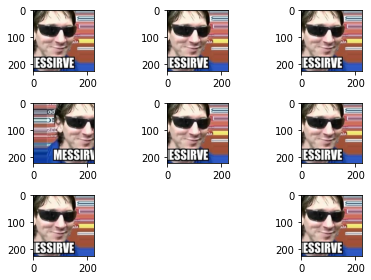

In [ ]:
# We convert the image to an array
data = img_to_array(img)
# we made an expansion to a sample 
samples = expand_dims(data, 0)
# We create the data booster using only image change 
datagen = ImageDataGenerator(width_shift_range=[-50,50])
# we prepare the iterator
it = datagen.flow(samples, batch_size=1)
# we generate samples and show the results
for i in range(9):
	plt.subplot(330 + 1 + i)
	# image batches are generated
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image rotation means reversing the rows or columns of pixels in the case of a vertical or horizontal rotation, respectively.
The magnification is specified by a **horizontal_flip** or **vertical_flip** boolean argument for the **ImageDataGenerator** class.

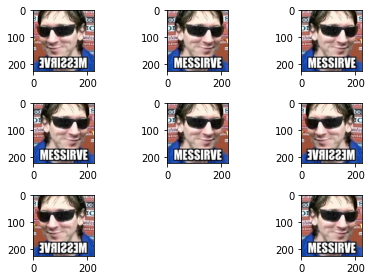

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is uniformly sampled at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If floating, [lower limit, upper limit] = [1-zoom_range, 1 + zoom_range].

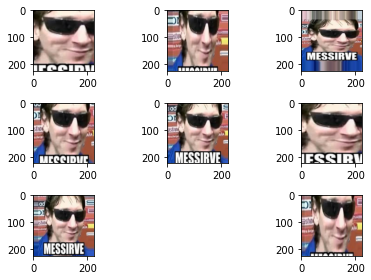

In [ ]:
datagen = ImageDataGenerator(zoom_range=.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
 
plt.show()

The image is randomly rotated clockwise a set number of degrees from 0 to 360. This may rotate the pixels out of the image frame and leave areas of the frame without pixel data to be completed.

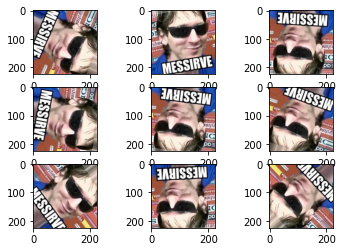

In [ ]:
datagen = ImageDataGenerator(rotation_range=220)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data from the dataset to be used, in many jobs an increase of data is used to increase the amount of training images and improve the accuracy of the work.


              featurewise_center: Bolean, set the average of each element to zero of all data.
              samplewise_center**: Bolean, set the average of each sample to zero
              featurewise_std_normalization: Bolean, Divide the entries by the standard deviation (std.) of the data set, according to the characteristics.
              samplewise_std_normalization: Bolean, divide each data by its std.
              zca_epsilon: The default value is 1e-6.
              zca_whitening: Bolean, indicates if ZCA bleaching is applied.      

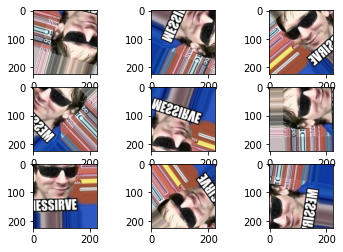

In [ ]:
datagen = ImageDataGenerator(
            rotation_range               = 90,      
            width_shift_range            = [50,50],   
            height_shift_range           = [50,50],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now that we consider words, the work required is not so simple given the inherent complexity of language (we cannot replace every word with its synonym and even if we do, we run the risk of the meaning of the sentence changing completely.
There are some libraries that can help us perform this task, we will start by analyzing the following ones:


1.   Text Attack
2.   Google Trans

# TextAttack
It is a Python framework for opponent attacks, opponent training and NLP data augmentation. We will focus only on data augmentation.

In [ ]:
!pip install textattack

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 3.0MB 7.5MB/s 
     |████████████████████████████████| 153kB 29.1MB/s 
     |████████████████████████████████| 102kB 10.3MB/s 
     |████████████████████████████████| 778kB 27.4MB/s 
     |████████████████████████████████| 317kB 30.9MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 1.7MB 2.7MB/s 
     |████████████████████████████████| 1.1MB 18.1MB/s 
     |████████████████████████████████| 235kB 27.0MB/s 
     |████████████████████████████████| 686kB 12.6MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 245kB 31.3MB/s 
     |████████████████████████████████| 17.3MB 201kB/s 
     |████████████████████████████████| 245kB 42.4MB/s 
     |████████████████████████████████| 102kB 11.2MB/s 
     |████████████████████████████████| 122kB 37.9MB/s 
     |████████████████████████████████| 102kB 10.0MB/s 

In [ ]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-16 02:57:31 INFO: Downloading default packages for language: en (English)...
2020-10-16 02:59:02 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
text = "God is dead and we have killed him"

TextAttack provides four methods of data enhancement.


## WordNetAugmenter
Increases the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is an English lexical database. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus, since it groups words according to their meaning.



In [ ]:
aug = WordNetAugmenter();
aug.augment(text)

['deity is dead and we have killed him']


## EmbeddingAugmenter
Increases text by transforming words with their inlays, with a restriction to ensure that their cosine similarity is at least 0.8.


In [ ]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:40<00:00, 11.8MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpgcjn13o7.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['God is dead and we have die him']

## CharSwapAugmenter
Increase text by substituting, deleting, inserting and exchanging adjacent characters.

In [ ]:
aug = CharSwapAugmenter()
aug.augment(text)

['oGd is dead and we have killed him']


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All 4 of these features occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [ ]:
aug = EasyDataAugmenter()
aug.augment(text)

['God is dead and we have defeat him',
 'God is dead we have killed him',
 'God is dead give and we have killed him',
 'God is dead and have we killed him']

Googletrans uses Google Translate's Ajax API for language detection and translation.

The main parts of the function **translate ()** are:



1.   **src**: Original language, this parameter is optional because **googletrans** will automatically detect the language.
2.   **dest**: Translated language, this is an obligatory parameter.

1.   **text**: the text to be translated from the source language to the target language. Parameter required.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then back to the original. During this retranslation, there is a slight change in the sentence between the original text and the retranslated text, but the general meaning of the sentence is still preserved.

Supported languages are available at https://cloud.google.com/translate/docs/languages?hl=es

To get the best results it is recommended to make some tests with the languages, if the target language is very similar the translation does not lose information, however you can have the problem that the translation is too literal, this becomes a bit of a trial and error problem.


Some examples of languages:


* Afrikaans 'af'.

* Chinese (simplified) 'zh-CN or zh'.

* Esperanto 'eo'.

* Japanese 'ja'.
* Latin 'la'.


* English 'en'.


* Turkmen 'tk'.


* Yiddish 'yi'.

* Zulu 'zu'.



In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.7MB/s 
     |████████████████████████████████| 972kB 4.1MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 71kB 5.5MB/s 
     |████████████████████████████████| 102kB 5.5MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=93675a599e307d0f9f2f02797fb2f38af648f01f64ad3d0c517305512137abc4
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=7d1b7e025ae128f5353f4aeef33df679a73d559992da9b68a87650fe1be80d71
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
origin_text = "Everyone is here... except Waluigi"
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='es').text
print(origin_text)
print(text_trans)
print(final)

Everyone is here... except Waluigi
Wonke umuntu ulapha ... ngaphandle kukaWaluigi
Todos están aquí ... excepto Waluigi
